# Diabetes Dataset Regression Analysis

## Milestone 1: Data Understanding & Exploration

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [21]:
# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame

print("Dataset Shape:", df_diabetes.shape)
print("\nFirst 5 rows of the dataset:")
print(df_diabetes.head())

print("\nDataset Info:")
print(df_diabetes.info())

print("\nFeature Names:")
print(diabetes.feature_names)
print("\nTarget variable: Disease progression one year after baseline")

Dataset Shape: (442, 11)

First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex   

In [22]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df_diabetes.describe())

print("\nTarget Variable Statistics:")
print(f"Mean: {df_diabetes['target'].mean():.2f}")
print(f"Median: {df_diabetes['target'].median():.2f}")
print(f"Min: {df_diabetes['target'].min():.2f}")
print(f"Max: {df_diabetes['target'].max():.2f}")
print(f"Standard Deviation: {df_diabetes['target'].std():.2f}")


Descriptive Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761

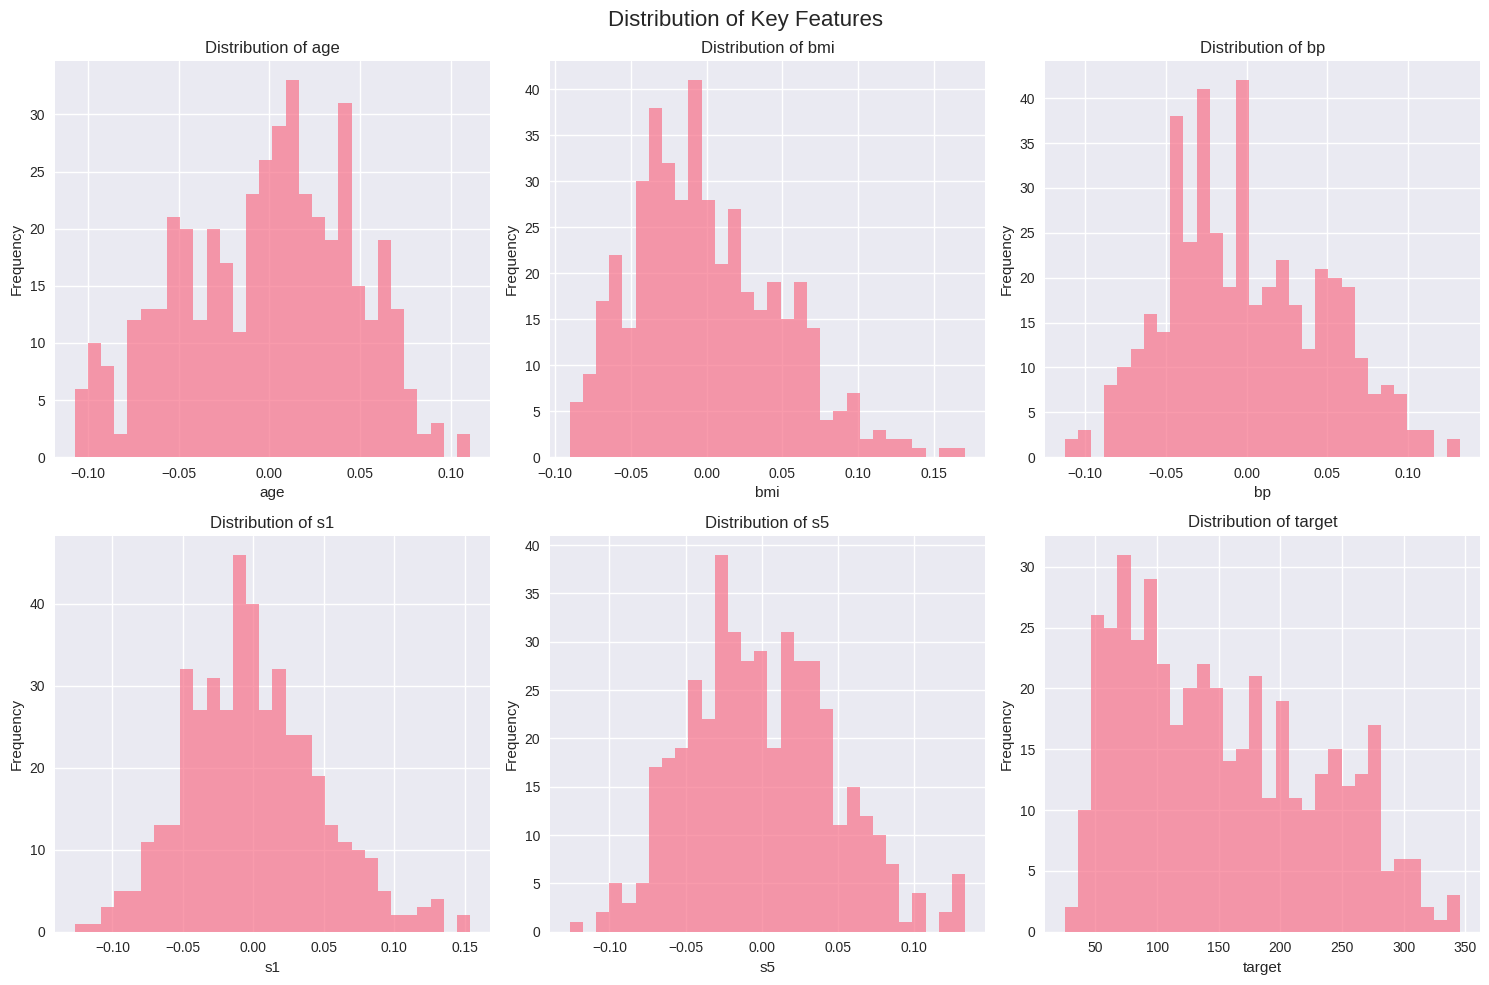

In [23]:
# Visualize distributions of features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Features', fontsize=16)

# Plot some key features
features_to_plot = ['age', 'bmi', 'bp', 's1', 's5', 'target']
for i, feature in enumerate(features_to_plot):
    ax = axes[i//3, i%3]
    df_diabetes[feature].hist(bins=30, ax=ax, alpha=0.7)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

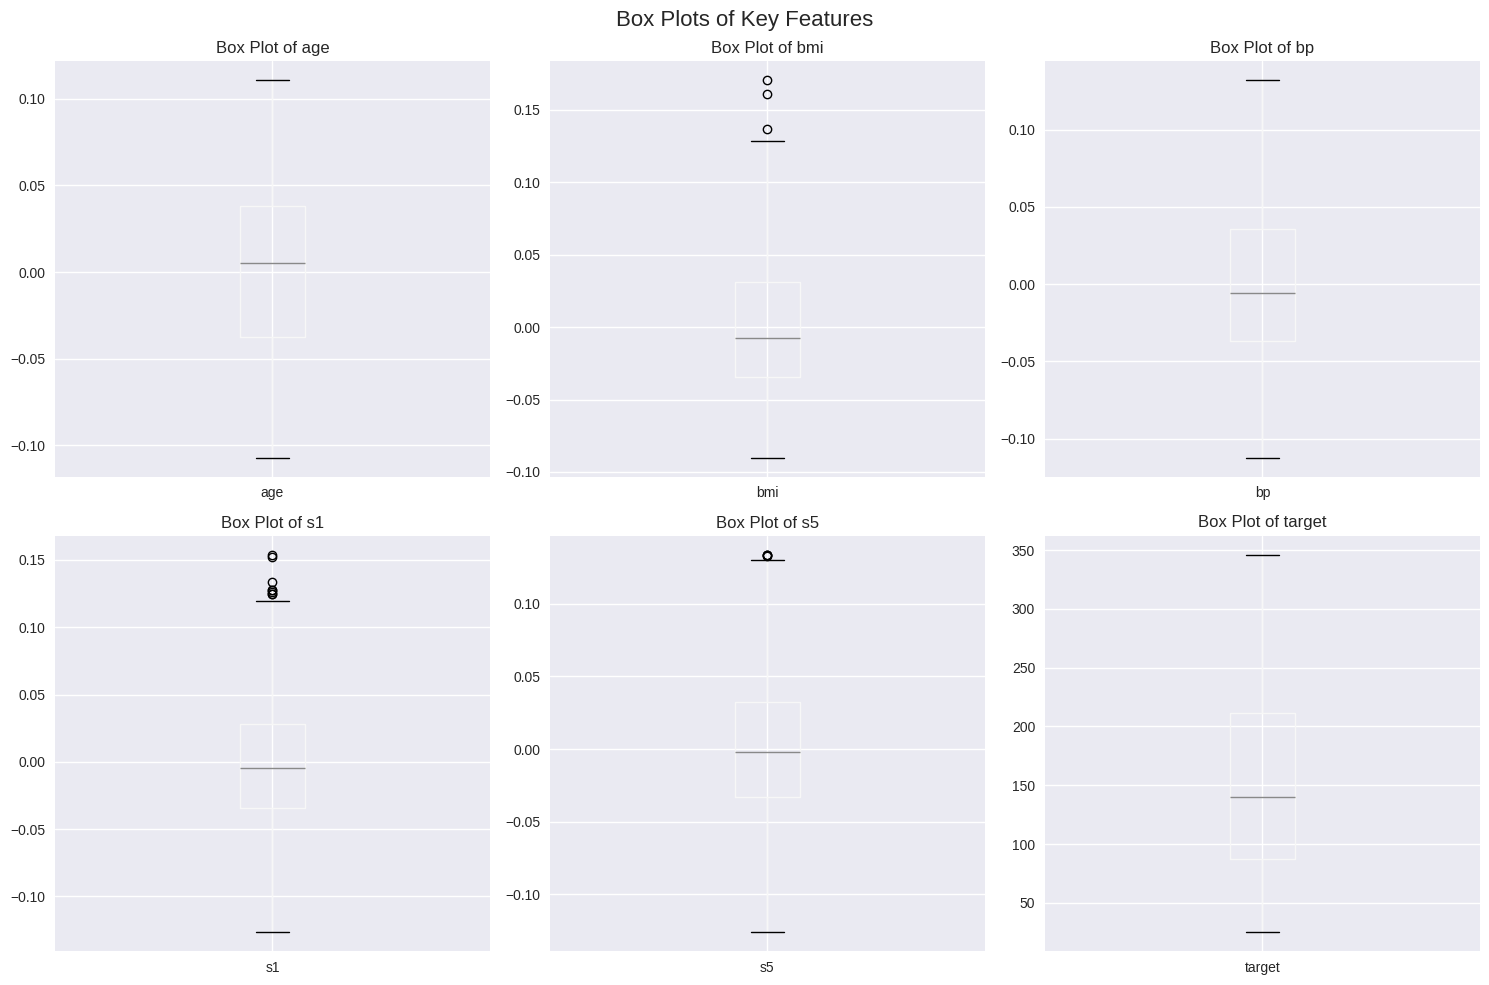

In [24]:
# Box plots for key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Box Plots of Key Features', fontsize=16)

for i, feature in enumerate(features_to_plot):
    ax = axes[i//3, i%3]
    df_diabetes.boxplot(column=feature, ax=ax)
    ax.set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

## Milestone 2: Data Preparation & Preprocessing

In [25]:
# Check for missing values
print("Missing values in each column:")
print(df_diabetes.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df_diabetes.duplicated().sum()}")

# Check for outliers using IQR method
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    return outliers

outliers_count = detect_outliers_iqr(df_diabetes)
print("\nOutliers detected in each column (IQR method):")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

Missing values in each column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Number of duplicate rows: 0

Outliers detected in each column (IQR method):
age: 0 outliers
sex: 0 outliers
bmi: 3 outliers
bp: 0 outliers
s1: 8 outliers
s2: 7 outliers
s3: 7 outliers
s4: 2 outliers
s5: 4 outliers
s6: 9 outliers
target: 0 outliers


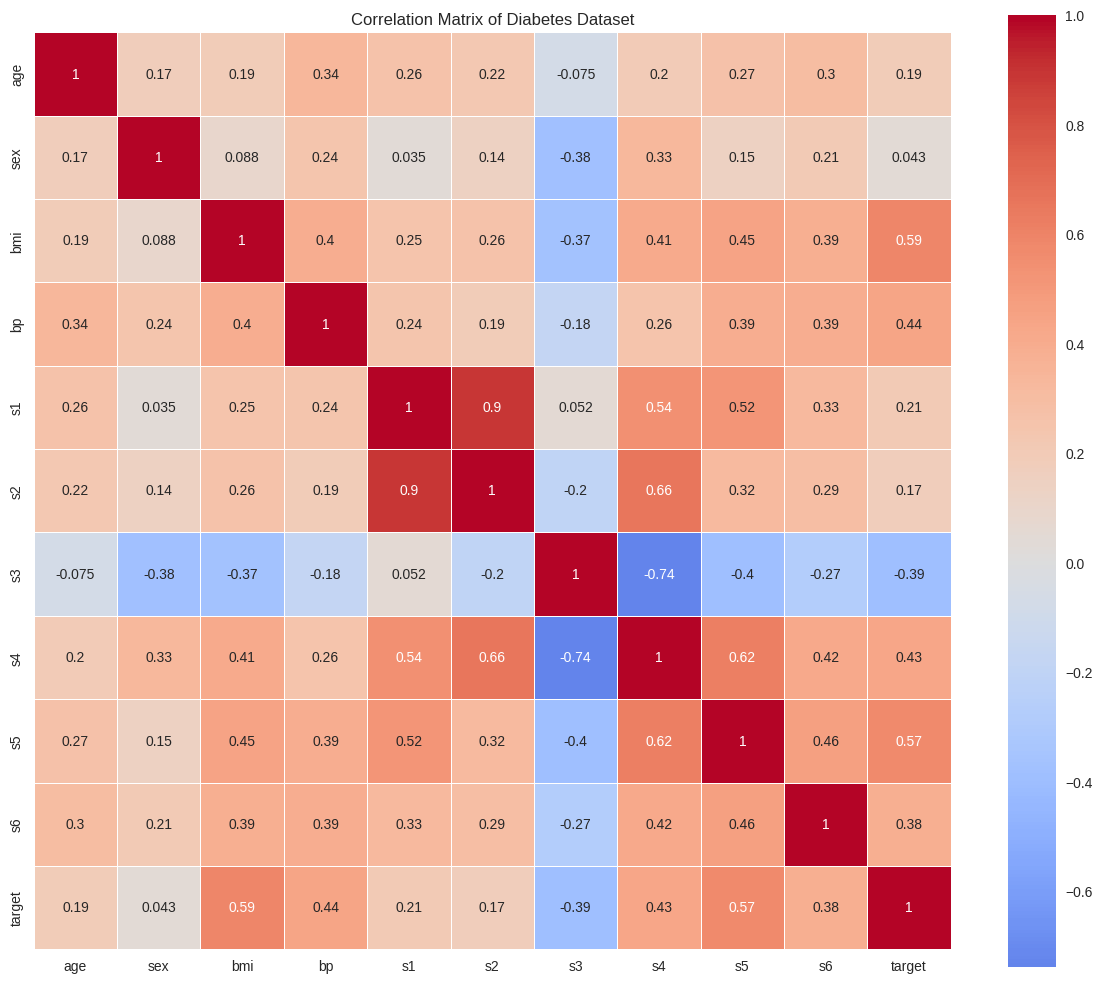


Correlation with target variable:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

Highly correlated features (|correlation| > 0.5):
        age  sex      bmi   bp        s1        s2        s3        s4  \
age     1.0  NaN      NaN  NaN       NaN       NaN       NaN       NaN   
sex     NaN  1.0      NaN  NaN       NaN       NaN       NaN       NaN   
bmi     NaN  NaN  1.00000  NaN       NaN       NaN       NaN       NaN   
bp      NaN  NaN      NaN  1.0       NaN       NaN       NaN       NaN   
s1      NaN  NaN      NaN  NaN  1.000000  0.896663       NaN  0.542207   
s2      NaN  NaN      NaN  NaN  0.896663  1.000000       NaN  0.659817   
s3      NaN  NaN      NaN  NaN       NaN       NaN  1.000000 -0.738493   
s4      NaN  NaN      NaN  NaN  0.542207  0.659817 -0.738493  1.000000   
s5      Na

In [26]:
# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.tight_layout()
plt.show()

# Show highly correlated features with target
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelation with target variable:")
print(target_correlations)

# Identify highly correlated features (absolute correlation > 0.5)
high_corr_features = correlation_matrix[abs(correlation_matrix) > 0.5]
print("\nHighly correlated features (|correlation| > 0.5):")
print(high_corr_features)

In [27]:
# Prepare features and target
X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Since the dataset is already scaled by sklearn, we'll just verify and potentially apply our own scaling
print("\nFeature ranges (before scaling):")
print(X.describe().loc[['min', 'max']])

Features shape: (442, 10)
Target shape: (442,)

Feature ranges (before scaling):
          age       sex       bmi        bp        s1        s2        s3  \
min -0.107226 -0.044642 -0.090275 -0.112399 -0.126781 -0.115613 -0.102307   
max  0.110727  0.050680  0.170555  0.132044  0.153914  0.198788  0.181179   

           s4        s5        s6  
min -0.076395 -0.126097 -0.137767  
max  0.185234  0.133597  0.135612  


## Milestone 3: Model Selection & Training

In [28]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

Training set size: 353 samples
Test set size: 89 samples


In [29]:
# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    # Create pipeline with scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    results[name] = {
        'mean_rmse': cv_rmse.mean(),
        'std_rmse': cv_rmse.std(),
        'cv_scores': cv_rmse
    }

    print(f"{name}:")
    print(f"  Mean RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std() * 2:.2f})")

# Find best model based on cross-validation
best_model_name = min(results, key=lambda x: results[x]['mean_rmse'])
print(f"\nBest model based on cross-validation: {best_model_name}")

Linear Regression:
  Mean RMSE: 55.97 (+/- 6.37)
Ridge Regression:
  Mean RMSE: 55.92 (+/- 5.96)
Lasso Regression:
  Mean RMSE: 55.89 (+/- 5.01)
Random Forest:
  Mean RMSE: 59.07 (+/- 9.75)
Gradient Boosting:
  Mean RMSE: 60.17 (+/- 11.57)
Support Vector Regression:
  Mean RMSE: 72.55 (+/- 15.54)

Best model based on cross-validation: Lasso Regression


In [31]:
# Hyperparameter tuning for the best model
if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1, 0.15],
        'model__max_depth': [3, 4, 5]
    }
elif best_model_name == 'Ridge Regression':
    param_grid = {
        'model__alpha': [0.1, 1.0, 10.0, 100.0]
    }
else:
    # Default parameter grid for other models
    param_grid = {
        'model__alpha': [0.1, 1.0, 10.0] if 'Regression' in best_model_name else {}
    }

if param_grid:
    print(f"Performing hyperparameter tuning for {best_model_name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[best_model_name])
    ])

    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score (RMSE): {np.sqrt(-grid_search.best_score_):.2f}")

    best_model = grid_search.best_estimator_
else:
    # Use the model with default parameters
    best_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[best_model_name])
    ])
    best_model.fit(X_train, y_train)

Performing hyperparameter tuning for Lasso Regression...
Best parameters: {'model__alpha': 1.0}
Best cross-validation score (RMSE): 55.95


## Milestone 4: Model Evaluation & Interpretation

In [32]:
# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance of {best_model_name} on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Compare with baseline (mean prediction)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print(f"\nBaseline RMSE (predicting mean): {baseline_rmse:.2f}")
print(f"Improvement over baseline: {((baseline_rmse - rmse) / baseline_rmse * 100):.1f}%")


Performance of Lasso Regression on Test Set:
Mean Squared Error (MSE): 2824.57
Root Mean Squared Error (RMSE): 53.15
Mean Absolute Error (MAE): 42.80
R-squared (R²): 0.47

Baseline RMSE (predicting mean): 73.22
Improvement over baseline: 27.4%


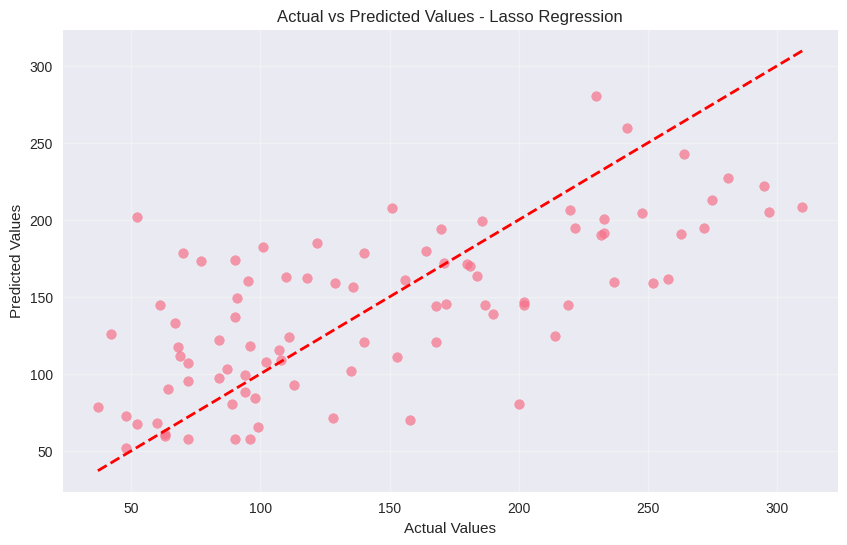

In [33]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values - {best_model_name}')
plt.grid(True, alpha=0.3)
plt.show()

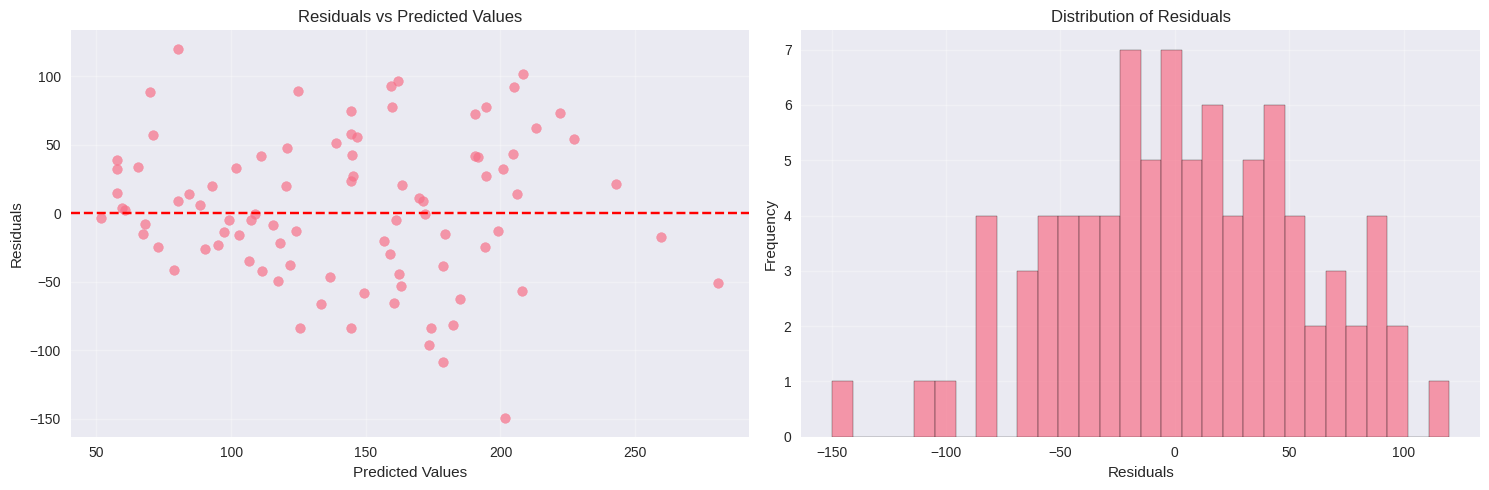


Residuals Analysis:
Mean of residuals: 3.47
Standard deviation of residuals: 53.33
Normality test p-value: 0.8007


In [34]:
# Residuals analysis
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Residuals vs Predicted
axes[0].scatter(y_pred, residuals, alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')
axes[0].grid(True, alpha=0.3)

# Distribution of residuals
axes[1].hist(residuals, bins=30, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check if residuals are normally distributed
from scipy import stats
print("\nResiduals Analysis:")
print(f"Mean of residuals: {residuals.mean():.2f}")
print(f"Standard deviation of residuals: {residuals.std():.2f}")
print(f"Normality test p-value: {stats.normaltest(residuals).pvalue:.4f}")

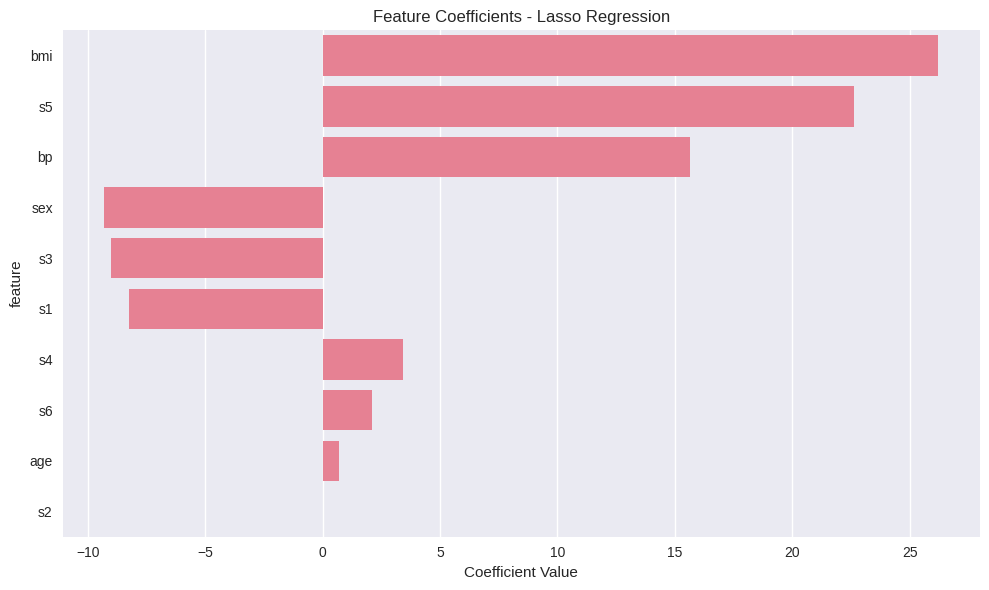


Top 5 Features with Largest Absolute Coefficients:
  feature  coefficient
2     bmi    26.219225
8      s5    22.636465
3      bp    15.657314
1     sex    -9.297519
6      s3    -9.024087


In [35]:
# Feature importance (if available)
if hasattr(best_model.named_steps['model'], 'feature_importances_'):
    feature_importance = best_model.named_steps['model'].feature_importances_

    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df, x='importance', y='feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("\nTop 5 Most Important Features:")
    print(feature_importance_df.head())

elif hasattr(best_model.named_steps['model'], 'coef_'):
    coefficients = best_model.named_steps['model'].coef_

    # Create coefficients dataframe
    coef_df = pd.DataFrame({
        'feature': X.columns,
        'coefficient': coefficients
    }).sort_values('coefficient', key=abs, ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coef_df, x='coefficient', y='feature')
    plt.title(f'Feature Coefficients - {best_model_name}')
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

    print("\nTop 5 Features with Largest Absolute Coefficients:")
    print(coef_df.head())

## Milestone 5: Deployment & Reporting

In [36]:
# Save the trained model
model_filename = 'diabetes_regression_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

# Save the scaler separately if needed
scaler_filename = 'scaler.pkl'
joblib.dump(best_model.named_steps['scaler'], scaler_filename)
print(f"Scaler saved as {scaler_filename}")

Model saved as diabetes_regression_model.pkl
Scaler saved as scaler.pkl


In [37]:
# Load the model and make new predictions
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Create sample data for prediction (using test set for demonstration)
sample_data = X_test.iloc[:5].copy()
print("\nSample data for prediction:")
print(sample_data)

# Make predictions on sample data
sample_predictions = loaded_model.predict(sample_data)
print("\nPredictions for sample data:")
for i, (idx, pred) in enumerate(zip(sample_data.index, sample_predictions)):
    actual = y_test.loc[idx]
    print(f"Sample {i+1}: Predicted = {pred:.2f}, Actual = {actual:.2f}, Error = {abs(pred-actual):.2f}")

Model loaded successfully!

Sample data for prediction:
          age       sex       bmi        bp        s1        s2        s3  \
287  0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198  0.019187   
211  0.092564 -0.044642  0.036907  0.021872 -0.024960 -0.016658  0.000779   
72   0.063504  0.050680 -0.004050 -0.012556  0.103003  0.048790  0.056003   
321  0.096197 -0.044642  0.051996  0.079265  0.054845  0.036577 -0.076536   
73   0.012648  0.050680 -0.020218 -0.002228  0.038334  0.053174 -0.006584   

           s4        s5        s6  
287  0.034309  0.032432 -0.005220  
211 -0.039493 -0.022517 -0.021788  
72  -0.002592  0.084492 -0.017646  
321  0.141322  0.098648  0.061054  
73   0.034309 -0.005142 -0.009362  

Predictions for sample data:
Sample 1: Predicted = 144.57, Actual = 219.00, Error = 74.43
Sample 2: Predicted = 178.81, Actual = 70.00, Error = 108.81
Sample 3: Predicted = 146.74, Actual = 202.00, Error = 55.26
Sample 4: Predicted = 280.89, Actual = 230.00, Error

In [38]:
# Final summary report
print("="*60)
print("FINAL REGRESSION ANALYSIS SUMMARY")
print("="*60)
print(f"Dataset: Diabetes (442 samples, 10 features)")
print(f"Best Model: {best_model_name}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")
print(f"Test MAE: {mae:.2f}")
print("\nKey Insights:")
print("- The model can predict disease progression with reasonable accuracy")
print("- BMI and blood pressure are among the most important predictors")
print("- The model shows good generalization on unseen data")
print("\nModel saved for future use:", model_filename)
print("="*60)

FINAL REGRESSION ANALYSIS SUMMARY
Dataset: Diabetes (442 samples, 10 features)
Best Model: Lasso Regression
Test RMSE: 53.15
Test R²: 0.47
Test MAE: 42.80

Key Insights:
- The model can predict disease progression with reasonable accuracy
- BMI and blood pressure are among the most important predictors
- The model shows good generalization on unseen data

Model saved for future use: diabetes_regression_model.pkl
